In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Основые функции, описывающие населения

In [106]:
from users import UserDistribution
from transport_types import TrainTransport, TaxiTransport, CarTransport

N = 100000
max_price = 300000
dis = UserDistribution(N, 1.1,  20000, max_price)
spec_road_coeff = 0.5
mem_time = 5

trans = [
#     TrainTransport(2200, 12000, 0, 1000000),
#     TaxiTransport(15000, 15000, 0, 0.5, 1000),
#     CarTransport(3000, 15000, 1000, 0)
    TrainTransport(32, 100 / max_price, 0 / N ** 4 / max_price, 30 / N ** 2),
    TaxiTransport(32, 60 / max_price, 10 / N ** 0.5, spec_road_coeff, 100 / N ** 4 / max_price),
    CarTransport(40, 45 / max_price, 100 / N ** 4  / max_price, 10)
]

# x0 = [N / 4, N / 4,  N / 2]
x0 = [0, 0, 0]
x_story = [x0]

In [107]:
for step in range(40):
    x = [0, 0, 0]
    for price, n in dis.distrib(80000):
        f0 = trans[0].cost(price, x0[0], x0[0])
        f1 = trans[1].cost(price, x0[1], (1 - spec_road_coeff) * x0[1] + x0[2])
        f2 = trans[2].cost(price, x0[2], x0[2] + (1 - spec_road_coeff) * x0[1])
#         print([f0, f1, f2])
        if f0 < f1 and f0 < f2:
            x[0] += n
        elif f1 < f0 and f1 < f2:
            x[1] += n
        else:
            x[2] += n
    x_story.append(x)
    if step > mem_time:
        x0 = np.average(np.array(x_story[-mem_time:]), axis=0)
    else:
        x0 = np.average(np.array(x_story), axis=0)
#     x0 = x

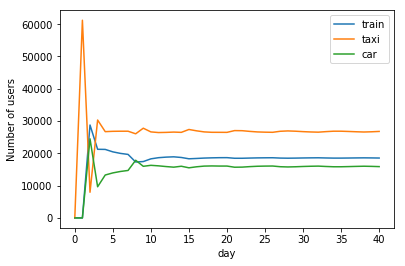

In [108]:
x_story_np = np.array(x_story)

plt.plot(x_story_np[:, 0], label='train')
plt.plot(x_story_np[:, 1], label='taxi')
plt.plot(x_story_np[:, 2], label='car')
# plt.ylim(0, 1.1 * N)
plt.ylabel("Number of users")
plt.xlabel("day")
plt.legend()

In [24]:
price_list = [[], [],[]]
for price, n in dis.distrib():
    f0 = trans[0].cost(price, x0[0], x0[0])
    f1 = trans[1].cost(price, x0[1], (1 - spec_road_coeff) * x0[1] + x0[2])
    f2 = trans[2].cost(price, x0[2], x0[2] + (1 - spec_road_coeff) * x0[1])
#         print([f0, f1, f2])
    if f0 < f1 and f0 < f2:
        price_list[0].append(price)
    elif f1 < f0 and f1 < f2:
        price_list[1].append(price)
    else:
        price_list[2].append(price)

In [27]:
print(min(price_list[1]), max(price_list[1]))

66546 299999


(100, 80000)

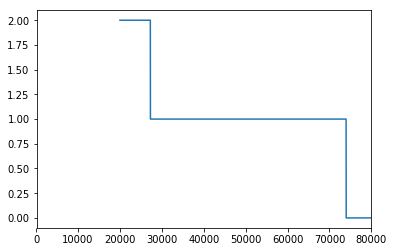

In [23]:
x = []
y = []
for price, n in dis.distrib():
    x.append(price)
    y.append(n)
plt.plot(x, y)
plt.xlim(100, 80000)

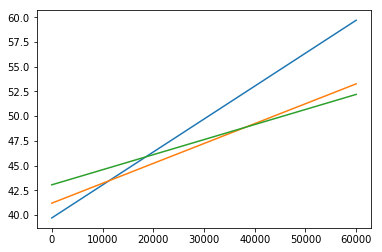

In [109]:
cost_list = []
for price in range(dis.min_salary, 80000):
    cost = [
        trans[0].cost(price, x0[0], x0[0]),
        trans[1].cost(price, x0[1], (1 - spec_road_coeff) * x0[1] + x0[2]),
        trans[2].cost(price, x0[2], x0[2] + (1 - spec_road_coeff) * x0[1])
    ]
    cost_list.append(cost)
cost_np = np.array(cost_list)
plt.plot(cost_np[:, 0])
plt.plot(cost_np[:, 1])
plt.plot(cost_np[:, 2])